In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
scaler = StandardScaler().set_output(transform='pandas')

In [3]:
milk = pd.read_csv("C:/Python/Datasets/milk.csv", index_col=0)
milk_scaled = scaler.fit_transform(milk)

In [4]:
clust = KMeans(random_state=25, n_clusters=3)
clust.fit(milk_scaled)
clust.labels_

array([1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 0, 0, 0, 0,
       0, 0, 0])

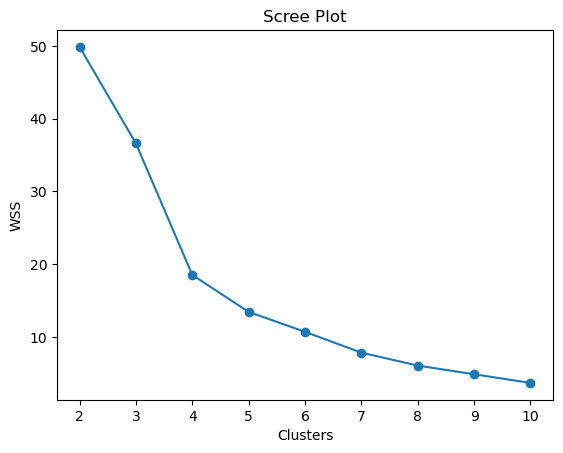

In [9]:
wss = []
for i in range(2, 11):
    clust = KMeans(random_state=25, n_clusters=i)
    clust.fit(milk_scaled)
    wss.append([i, clust.inertia_] )
df_wss = pd.DataFrame( wss, columns=['clusters','wss'] )
plt.scatter(df_wss['clusters'], df_wss['wss'])
plt.plot( df_wss['clusters'], df_wss['wss'] )
plt.xlabel("Clusters")
plt.ylabel("WSS")
plt.title("Scree Plot")
plt.show()

With Silhouette Score

In [10]:
scores = []
for i in range(2, 11):
    clust = KMeans(random_state=25, n_clusters=i)
    clust.fit(milk_scaled)
    scores.append([i, silhouette_score(milk_scaled, clust.labels_)] )
df_score = pd.DataFrame( scores, columns=['clusters','score'] )
df_score.sort_values('score', ascending=False)

,clusters,score
0,2,0.525851
2,4,0.423246
4,6,0.412161
8,10,0.407573
7,9,0.406707
3,5,0.399843
5,7,0.398780
6,8,0.397209
1,3,0.353503


In [12]:
df_copy = milk.copy()
clust = KMeans(random_state=25, n_clusters=2)
clust.fit(milk_scaled)
df_copy['cluster'] = clust.labels_
df_copy.groupby('cluster').mean()

,water,protein,fat,lactose,ash
cluster,,,,,
0,63.362500,10.412500,21.662500,1.975000,1.347500
1,85.158824,4.235294,4.964706,5.147059,0.635294


In [ ]:
df_copy[df_copy['cluster'] ==0]

In [ ]:
df_copy[df_copy['cluster'] ==1]

#### Nutrient

In [15]:
nut = pd.read_csv("C:/Python/Datasets/nutrient.csv", index_col=0)
nut_scaled = scaler.fit_transform( nut )
scores = []
for i in range(2, 11):
    clust = KMeans(random_state=25, n_clusters=i)
    clust.fit(nut_scaled)
    scores.append([i, silhouette_score(nut_scaled, clust.labels_)] )
df_score = pd.DataFrame( scores, columns=['clusters','score'] )
df_score.sort_values('score', ascending=False)

,clusters,score
2,4,0.419974
5,7,0.402943
4,6,0.381370
3,5,0.378018
7,9,0.377910
6,8,0.377523
8,10,0.366987
1,3,0.357822
0,2,0.325778


In [17]:
df_copy = nut.copy()
clust = KMeans(random_state=25, n_clusters=4)
clust.fit(nut_scaled)
df_copy['cluster'] = clust.labels_
df_copy.groupby('cluster').mean()

,energy,protein,fat,calcium,iron
cluster,,,,,
0,151.666667,18.333333,7.666667,227.666667,1.666667
1,341.875000,18.750000,28.875000,8.750000,2.437500
2,163.928571,20.714286,7.714286,19.857143,2.028571
3,57.500000,9.000000,1.000000,78.000000,5.700000


In [21]:
df_copy[df_copy['cluster']==3]

,energy,protein,fat,calcium,iron,cluster
Food_Item,,,,,,
CLAMS RAW,70,11,1,82,6.0,3
CLAMS CANNED,45,7,1,74,5.4,3
